In [49]:
import numpy as np
import os,glob,struct
import xarray as xr
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [50]:
from parflow import Run
from parflow.tools.fs import exists, chdir, mkdir, cp, rm
from parflow import read_pfb, read_pfb_sequence, ParflowBinaryReader,write_pfb
from parflow.tools import hydrology as pfhydro

import os,shutil,copy


In [51]:
root_dir = "/home/hectorb/PARFLOW/PROJECTS/test_cases/ara/resolution/simus/"
forc_dir = "/home/hectorb/PARFLOW/PROJECTS/test_cases/ara/forcings/"

In [52]:
ara = Run.from_definition(root_dir+'ara250.pfidb')

 => Error during CLM import - CLM specific key have been skipped


Run Simulation #1

In [53]:
wdir = root_dir+'results_test_domains/'

In [54]:
domains_orig = read_pfb(root_dir+'domains_Ara250.pfb')

In [55]:
domains_orig[:,0,0]

array([3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 1., 1., 1.])

In [56]:
vdz_orig = read_pfb(root_dir+'vardz_Ara250.pfb')

In [57]:
vdz_orig.shape

(15, 20, 20)

In [58]:
vdz_orig[:,0,0]

array([4.16, 2.7 , 1.8 , 0.9 , 0.6 , 0.32, 0.16, 0.16, 0.44, 0.32, 0.16,
       0.04, 0.04, 0.16, 0.04])

In [59]:
vdz_new_vec = np.array([4.16, 2.7 , 1.8 , 0.9 , 0.6 , 0.32, 0.16, 0.16, 0.12, 0.04, 0.04,0.24, 0.44, 0.24, 0.04, 0.04, 0.16, 0.04])
vdz_new = np.swapaxes(np.tile(vdz_new_vec,(vdz_orig.shape[1],vdz_orig.shape[2],1)),0,2)
vdz_new.shape

(18, 20, 20)

In [60]:
vdz_new[:,0,0]

array([4.16, 2.7 , 1.8 , 0.9 , 0.6 , 0.32, 0.16, 0.16, 0.12, 0.04, 0.04,
       0.24, 0.44, 0.24, 0.04, 0.04, 0.16, 0.04])

In [61]:
domains_new_vec = np.array([3., 3., 3., 3., 3., 3., 3., 4.,4.,4., 2., 2., 2., 2., 2., 1., 1.,1.])
domains_new = np.swapaxes(np.tile(domains_new_vec,(domains_orig.shape[1],domains_orig.shape[2],1)),0,2)
domains_new.shape

(18, 20, 20)

In [15]:
ara.ComputationalGrid.Lower.X

343125.0

In [62]:
if os.path.exists(wdir):
    shutil.rmtree(wdir)
os.mkdir(wdir)

shutil.copy(forc_dir+'lai.dat',wdir+'lai.dat')
shutil.copy(forc_dir+'sai.dat',wdir+'sai.dat')
shutil.copy(forc_dir+'z0m.dat',wdir+'z0m.dat')
shutil.copy(forc_dir+'displa.dat',wdir+'displa.dat')
shutil.copy(forc_dir+'forcagePF.200706070809101112131415_forc_nal2.30mn.dat',wdir+'forcagePF.txt.0')
shutil.copy(root_dir+'drvvegm_zin_250m.pfb',wdir+'veg_map.pfb')
shutil.copy(root_dir+'drvvegm_zin_250m.dat',wdir+'drv_vegm.dat')
shutil.copy(root_dir+'drv_vegp.dat',wdir+'drv_vegp.dat')
shutil.copy(root_dir+'drv_clmin_200706070809101112.dat.0',wdir+'drv_clmin.dat')
shutil.copy(root_dir+'slopex_Ara250.pfb',wdir+'xslope.pfb')
shutil.copy(root_dir+'slopey_Ara250.pfb',wdir+'yslope.pfb')
#shutil.copy(root_dir+'vardz_Ara250.pfb',wdir+'var_dz.pfb')
#shutil.copy(root_dir+'domains_Ara250.pfb',wdir+'domains.pfb')

#shutil.copy(root_dir+'mask_ara250_offset.pfsol',wdir+'mask.pfsol')

shutil.copy(root_dir+'mask_ara250_offset_nz18.pfsol',wdir+'mask.pfsol')


ara.ComputationalGrid.NZ=18
write_pfb(wdir+'var_dz_new.pfb',vdz_new,x=ara.ComputationalGrid.Lower.X,y=ara.ComputationalGrid.Lower.Y,z=ara.ComputationalGrid.Lower.Z,
          p = ara.ComputationalGrid.NX,Q=ara.ComputationalGrid.NY,r=ara.ComputationalGrid.NZ,dx=ara.ComputationalGrid.DX,dy=ara.ComputationalGrid.DY,
          dz= ara.ComputationalGrid.DZ)
write_pfb(wdir+'domains_new.pfb',domains_new,x=ara.ComputationalGrid.Lower.X,y=ara.ComputationalGrid.Lower.Y,z=ara.ComputationalGrid.Lower.Z,
          p = ara.ComputationalGrid.NX,Q=ara.ComputationalGrid.NY,r=ara.ComputationalGrid.NZ,dx=ara.ComputationalGrid.DX,dy=ara.ComputationalGrid.DY,
          dz= ara.ComputationalGrid.DZ)
vdz_new_check = read_pfb(wdir+'var_dz_new.pfb')
vdz_new_check[:,0,0]

array([4.16, 2.7 , 1.8 , 0.9 , 0.6 , 0.32, 0.16, 0.16, 0.12, 0.04, 0.04,
       0.24, 0.44, 0.24, 0.04, 0.04, 0.16, 0.04])

In [170]:
write_pfb?

Signature:
write_pfb(
    file,
    array,
    p=1,
    q=1,
    r=1,
    x=0.0,
    y=0.0,
    z=0.0,
    dx=1.0,
    dy=1.0,
    dz=1.0,
    z_first=True,
    dist=True,
    **kwargs,
)
Docstring:
Write a single pfb file. The data must be a 3D numpy array with float64
values. The number of subgrids in the saved file will be p * q * r. This
is regardless of the number of subgrids in the PFB file loaded by the
ParflowBinaryReader into the numpy array. Therefore, loading a file with
ParflowBinaryReader and saving it with this method may restructure the
file into a different number of subgrids if you change these values.

If dist is True then also write a file with the .dist extension added to
the file_name. The .dist file will contain one line per subgrid with the
offset of the subgrid in the .pfb file.

:param file:
    The name of the file to write the array to.
:param array:
    The array to write.
:param p:
    Number of subgrids in the x direction.
:param q:
    Number of subgrids 

In [63]:

ara.dist(wdir+'veg_map.pfb')
ara.dist(wdir+'xslope.pfb')
ara.dist(wdir+'yslope.pfb')
ara.dist(wdir+'yslope.pfb')
ara.dist(wdir+'domains_new.pfb')
ara.dist(wdir+'var_dz_new.pfb')

In [64]:
#update new keys
ara.GeomInput.H1_input.GeomNames 
ara.Geom.H1_input.FileName = 'domains_new.pfb'
ara.Geom.domain.dzScale.FileName = 'var_dz_new.pfb'
ara.Geom.H2.Perm.Value = 0.36
ara.Geom.H4.Perm.Value = 0.00036
ara.Geom.H2.RelPerm.Alpha = 0.77
ara.Geom.H2.RelPerm.N = 1.7
ara.Geom.H4.RelPerm.Alpha = 0.77
ara.Geom.H4.RelPerm.N = 1.5

ara.Geom.H2.Saturation.Alpha = 0.77
ara.Geom.H2.Saturation.N = 1.7
ara.Geom.H4.Saturation.Alpha = 0.77
ara.Geom.H4.Saturation.N = 1.5

In [65]:
ara.run(working_directory=wdir,skip_validation=True)


# ==============================================================================
# ParFlow directory
#  - /home/hectorb/PARFLOW/SOURCES/PF_2022_07/parflow
# ParFlow version
#  - 3.3.1
# Working directory
#  - /home/hectorb/PARFLOW/PROJECTS/test_cases/ara/resolution/simus/results_test_domains
# ParFlow database
#  - ara250.pfidb
# ==============================================================================

# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



Run simulation #2

In [20]:
wdir2 = root_dir+'results_benchmark'

In [21]:
with ParflowBinaryReader(wdir+'ara250.out.press.00000.pfb') as s: h = s.header
print(h)

{'x': 343125.0, 'y': 1076625.0, 'z': 0.0, 'nx': 20, 'ny': 20, 'nz': 18, 'dx': 250.0, 'dy': 250.0, 'dz': 2.0, 'n_subgrids': 4, 'p': 2, 'q': 2, 'r': 1}


In [22]:
ds = xr.open_dataset(wdir+'ara250.out.press.00000.pfb',name="press",engine='parflow')

In [23]:
ds

<xarray.Dataset>
Dimensions:  (z: 18, y: 20, x: 20)
Dimensions without coordinates: z, y, x
Data variables:
    press    (z, y, x) float64 ...

In [66]:
var_dz = read_pfb(glob.glob(wdir+'*mult*.pfb')[0])[:,0,0]
var_dz = var_dz[::-1]
print(var_dz)
dz = var_dz * h['dz']
print(dz)
z = np.cumsum(dz) - var_dz/2 
print(z)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 1.5  3.5  5.5  7.5  9.5 11.5 13.5 15.5 17.5 19.5 21.5 23.5 25.5 27.5
 29.5 31.5 33.5 35.5]


In [67]:
var_dz2 = read_pfb(glob.glob(wdir+'*var_dz_new*.pfb')[0])[:,0,0]
var_dz2 = var_dz2[::-1]
print(var_dz2)
dz = var_dz2 * h['dz']
print(dz)
z = np.cumsum(dz) - var_dz2/2 
print(z)

[0.04 0.16 0.04 0.04 0.24 0.44 0.24 0.04 0.04 0.12 0.16 0.16 0.32 0.6
 0.9  1.8  2.7  4.16]
[0.08 0.32 0.08 0.08 0.48 0.88 0.48 0.08 0.08 0.24 0.32 0.32 0.64 1.2
 1.8  3.6  5.4  8.32]
[ 0.06  0.32  0.46  0.54  0.92  1.7   2.28  2.46  2.54  2.74  3.04  3.36
  3.92  4.98  6.63  9.78 14.73 22.32]


Read in pressure 

In [68]:
files = np.sort(glob.glob(wdir+'*.press.*.pfb'))
da = read_pfb_sequence(files)

In [69]:
np.shape(da)

(1461, 18, 20, 20)

In [28]:
press = xr.Dataset({"press": (("time","z","y","x"), da)},
    coords={"x":np.arange(start = h['x'],stop = h['x']+h['nx']*h['dx'],step=h['dx']),
        "y":np.arange(start = h['y'],stop = h['y']+h['ny']*h['dy'],step=h['dy']),
        "z":-z, 
        "time": pd.date_range("2005-01-01", periods=len(files)),
        "reference_time": pd.Timestamp("2005-01-01")})

ds.press.attrs['units']='m'
ds.x.attrs['units']='meters'
ds.y.attrs['units']='meters'
ds.z.attrs['units']='meters'


In [29]:
data = ara.data_accessor
data

In [70]:
def read_pf_outputs(wdir,date_start="2005-01-01"):
    # read header
    with ParflowBinaryReader(glob.glob(wdir+'*.press.00000.pfb')[0]) as s: h = s.header
    print(h)
    
    # get z
    var_dz = read_pfb(glob.glob(wdir+'*mult*.pfb')[0])[:,0,0]
    var_dz = var_dz[::-1]
    dz = var_dz * h['dz']
    z = np.cumsum(dz) - var_dz/2 
    
    # get slopes
    slopex = read_pfb(glob.glob(wdir+'*slope_x*.pfb')[0])
    slopey = read_pfb(glob.glob(wdir+'*slope_y*.pfb')[0])
    
    
    # get pressure (pop(0) skips initial condition)
    files = np.sort(glob.glob(wdir+'*.press.*.pfb'))[1::]
    press = read_pfb_sequence(files)
    
    # get saturation
    files = np.sort(glob.glob(wdir+'*.satur.*.pfb'))[1::]
    satur = read_pfb_sequence(files)
    
    # get evaptranssum
    files = np.sort(glob.glob(wdir+'*.evaptranssum.*.pfb'))
    evaptranssum = read_pfb_sequence(files)
        
    # create dataset
    ds = xr.Dataset({"press": (("time","z","y","x"), press[:,::-1,:,:]),
                    "satur": (("time","z","y","x"), satur[:,::-1,:,:]),
                    "evaptranssum": (("time","z","y"), evaptranssum[:,::-1,:,0])},
        coords={"x":np.arange(start = h['x'],stop = h['x']+h['nx']*h['dx'],step=h['dx']),
            "y":np.arange(start = h['y'],stop = h['y']+h['ny']*h['dy'],step=h['dy']),
            "z":-z, 
            "time": pd.date_range(date_start, periods=len(files)),
            "reference_time": pd.Timestamp(date_start)})

    # add WTD:
    ds = ds.assign(WTD = z[-1] - ds.press.isel(z=-1))
    
    ds.press.attrs['units']='m'
    ds.satur.attrs['units']='m3/m3'
    ds.evaptranssum.attrs['units']='m3/hr'
    ds.x.attrs['units']='meters'    
    ds.y.attrs['units']='meters'
    ds.z.attrs['units']='meters'
    return ds

In [71]:
ds1 = read_pf_outputs(root_dir+'results_benchmark/')
ds2 = read_pf_outputs(root_dir+'results_test_domains/')

{'x': 343125.0, 'y': 1076625.0, 'z': 0.0, 'nx': 20, 'ny': 20, 'nz': 15, 'dx': 250.0, 'dy': 250.0, 'dz': 2.0, 'n_subgrids': 4, 'p': 2, 'q': 2, 'r': 1}
{'x': 343125.0, 'y': 1076625.0, 'z': 0.0, 'nx': 20, 'ny': 20, 'nz': 18, 'dx': 250.0, 'dy': 250.0, 'dz': 2.0, 'n_subgrids': 4, 'p': 2, 'q': 2, 'r': 1}


In [178]:
ds1

<xarray.Dataset>
Dimensions:         (time: 1460, z: 15, y: 20, x: 20)
Coordinates:
  * x               (x) float64 3.431e+05 3.434e+05 ... 3.476e+05 3.479e+05
  * y               (y) float64 1.077e+06 1.077e+06 ... 1.081e+06 1.081e+06
  * z               (z) float64 -1.5 -3.5 -5.5 -7.5 ... -23.5 -25.5 -27.5 -29.5
  * time            (time) datetime64[ns] 2005-01-01 2005-01-02 ... 2008-12-30
    reference_time  datetime64[ns] 2005-01-01
Data variables:
    press           (time, z, y, x) float64 -3.403e+38 -3.403e+38 ... -3.403e+38
    satur           (time, z, y, x) float64 0.05 0.05 0.05 ... 0.01 0.01 0.01
    evaptranssum    (time, z, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    WTD             (time, y, x) float64 3.403e+38 3.403e+38 ... 3.403e+38

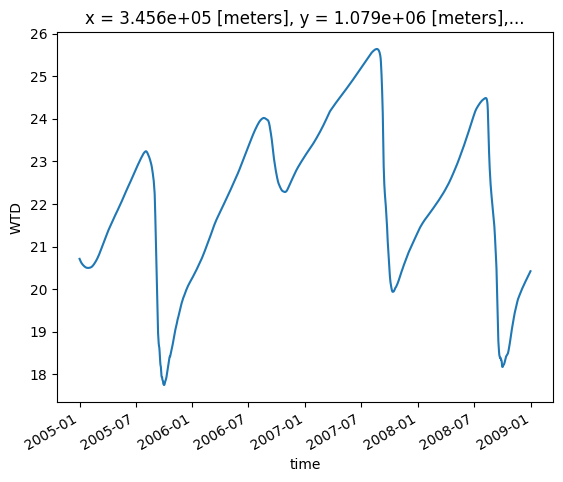

In [179]:
ds2.WTD.isel(y=10,x=10).plot()

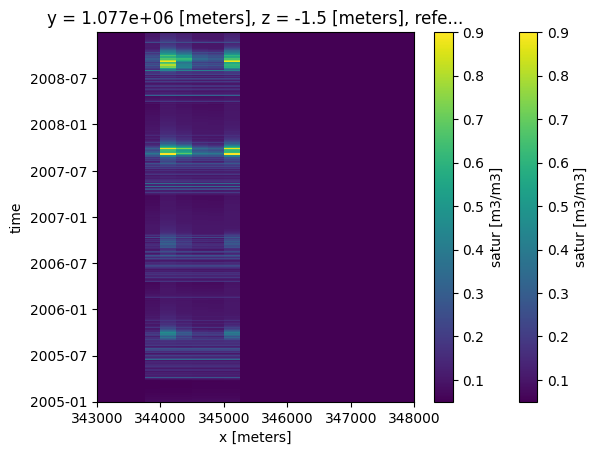

In [72]:
ds1.satur.sel(z=-.2,y=100,method='nearest').plot()
ds2.satur.sel(z=-.2,y=100,method='nearest').plot()

## Lecture des variables CLM (evapotranspiration, notamment)
Dans le manuel, les variables CLM écrites sont :
- *eflx_lh_tot* for latent heat flux total [W/m 2 ] 
- *eflx_lwrad_out* for outgoing long-wave radiation [W/m 2 ] 
- *eflx_sh_tot* for sensible heat flux total [W/m 2 ] 
- *eflx_soil_grnd* for ground heat flux [W/m 2 ] 
- *qflx_evap_tot* for total evaporation [mm/s] 
- *qflx_evap_grnd* for ground evaporation without condensation [mm/s] 
- *qflx_evap_soi* for soil evaporation [mm/s] 
- *qflx_evap_veg* for vegetation evaporation [mm/s] 
- *qflx_tran_veg* for vegetation transpiration [mm/s]
- *qflx_infl* for soil infiltration [mm/s]
- *swe_out* for snow water equivalent [mm]
- *t_grnd* for ground surface temperature [K]
- *t_soil* for soil temperature over all layers [K] 

In [73]:
def read_clm_outputs(wdir_tmp,date_start="2005-01-01"):
    with ParflowBinaryReader(glob.glob(wdir_tmp+'*.clm_output.00001.C.pfb')[0]) as s: h = s.header
    
    files = np.sort(glob.glob(wdir_tmp+'*.clm_output.*.pfb'))
    clms = read_pfb_sequence(files)
    #clms = read_pfb_sequence(files,z_is='variable')    
    # create dataset
    ds = xr.Dataset({"lh_tot": (("time","y","x"), clms[:,0,:,:]),
                    "lwrad_out": (("time","y","x"), clms[:,1,:,:]),
                    "sh_tot": (("time","y","x"), clms[:,2,:,:]),
                    "soil_grnd": (("time","y","x"), clms[:,3,:,:]),
                    "evap_tot": (("time","y","x"), clms[:,4,:,:]*60*60),
                    "evap_grnd": (("time","y","x"), clms[:,5,:,:]*60*60),
                    "evap_soi": (("time","y","x"), clms[:,6,:,:]*60*60),
                    "evap_veg": (("time","y","x"), clms[:,7,:,:]*60*60),
                    "tran_veg": (("time","y","x"), clms[:,8,:,:]*60*60),
                    "infl": (("time","y","x"), clms[:,9,:,:]*60*60),
                    "swe_out": (("time","y","x"), clms[:,10,:,:]),
                    "t_grnd": (("time","y","x"), clms[:,11,:,:]),
                    "htop": (("time","y","x"), clms[:,12,:,:])},

        coords={"x":np.arange(start = h['x'],stop = h['x']+h['nx']*h['dx'],step=h['dx']),
            "y":np.arange(start = h['y'],stop = h['y']+h['ny']*h['dy'],step=h['dy']),
            "time": pd.date_range(date_start, periods=len(files),freq='1H'),
            "reference_time": pd.Timestamp(date_start)})

    ds.lh_tot.attrs['units']='$W/m^2$'
    ds.lwrad_out.attrs['units']='$W/m^2$'
    ds.sh_tot.attrs['units']='$W/m^2$'
    ds.soil_grnd.attrs['units']='$W/m^2$'
    ds.evap_tot.attrs['units']='mm/h'
    ds.evap_grnd.attrs['units']='mm/h'
    ds.evap_soi.attrs['units']='mm/h'
    ds.evap_veg.attrs['units']='mm/h'
    ds.tran_veg.attrs['units']='mm/h'
    ds.infl.attrs['units']='mm/h'
    ds.swe_out.attrs['units']='mm'
    ds.t_grnd.attrs['units']='K'
    ds.htop.attrs['units']='m'

    ds.x.attrs['units']='meters'
    ds.y.attrs['units']='meters'
    return ds

In [32]:
dc1 = read_clm_outputs(root_dir+'results_benchmark/')

In [74]:
dc2 = read_clm_outputs(root_dir+'results_test_domains/')

In [75]:
# get slopes
slopex = read_pfb(glob.glob(wdir+'*slope_x*.pfb')[0])
slopey = read_pfb(glob.glob(wdir+'*slope_y*.pfb')[0])
mask = read_pfb(glob.glob(wdir+'*mask*.pfb')[0])

In [76]:

def calculate_runoff_maps(htop,slopex,slopey,mannings,nx,ny,dx,dy,nt,mask,KWE='Stan',large_array=True,epsilon = 1E-7):
    """
    calculate runoff for each pixel following Rcalc in Priority flow. 
    Two options of flow calc (UP and STAN) and 2 options regarding problem dimensions: using time loops of large matrix)
    
    2D arrays are : htop, slopex, slopey and mannings. first dimension is x (West->East), second is y (South->North). So lower left is [0,0] and upper right is [nx,ny]
    htop is surface pressure
    
    options are:
    - KWE: 'UP' stands for former overland calculation where the slopes are given at the cell centers and upwinded using fluxes
    - KWE: 'Stan' stands for the new OverlandKinematic formulation where the slopes are given at the cell interfaces and upwinded using h
    - large_array: if htop is very large (nx,ny,nt), this is the default, and time loop are being used. Otherwise, a direct 3D matrix method is used (for KWE='UP')
    
    returns:
    outflow: a 3D array (NX,NY,NT)
    
    The comments and R code from Priority flow are included for tracking purposes.
    
    TODO: implement 3D matrix operations for KWE = 'Stan'
    
    """
    outflow = np.zeros((nx,ny,nt))
    if KWE=='UP':
        if large_array==False:
            #if working with large NX NY NT array is doable: 
            qx= -np.sign(np.repeat(slopex[:,:,np.newaxis],nt,axis=2))*np.abs(np.repeat(slopex[:,:,np.newaxis],nt,axis=2))**0.5/np.repeat(mannings[:,:,np.newaxis],nt,axis=2) * np.maximum(htop,np.zeros((nx,ny,nt)))**(5/3) * dy #Units should be l3/t
            qeast= np.maximum(qx[0:(nx-1),:,:],np.zeros((nx-1,ny,nt))) - np.maximum(-qx[1:nx,:,:],np.zeros((nx-1,ny,nt))) # 100s for 2 years oueme domain (144x144)
            qeast=np.concatenate((-np.maximum(-np.reshape(qx[0,:,:],(1,ny,nt)),np.zeros((1,ny,nt))),qeast),axis=0) 
            qeast=np.concatenate((qeast,np.maximum(np.reshape(qx[nx-1,:,:],(1,ny,nt)),np.zeros((1,ny,nt)))),axis=0) 
            qy= -np.sign(np.repeat(slopey[:,:,np.newaxis],nt,axis=2))*np.abs(np.repeat(slopey[:,:,np.newaxis],nt,axis=2))**0.5/np.repeat(mannings[:,:,np.newaxis],nt,axis=2) * np.maximum(htop,np.zeros((nx,ny,nt)))**(5/3) * dx #Units should be l3/t
            qnorth= np.maximum(qy[:,0:(ny-1),:],np.zeros((nx,ny-1,nt))) - np.maximum(-qy[:,1:ny,:],np.zeros((nx,ny-1,nt)))
            qnorth=np.concatenate((-np.maximum(-np.reshape(qy[:,0,:],(nx,1,nt)),np.zeros((nx,1,nt))),qnorth),axis=1) 
            qnorth=np.concatenate((qnorth,np.maximum(np.reshape(qy[:,ny-1,:],(nx,1,nt)),np.zeros((nx,1,nt)))),axis=1) 
            outflow=np.maximum(qeast[1:nx+1,:,:],np.zeros((nx,ny,nt))) + np.maximum(-qeast[0:nx,:,:], np.zeros((nx,ny,nt))) + np.maximum(qnorth[:,1:ny+1,:],np.zeros((nx,ny,nt))) + np.maximum(-qnorth[:,0:ny,:], np.zeros((nx,ny,nt)))
            #otherwise:
        else:
            for i in range(nt):
                ptop = htop[:,:,i]
                ptop[ptop<0]=0
                #####
                #Calculate fluxes across east and north faces
                #First the x direction
                qx= -np.sign(slopex)*np.abs(slopex)**0.5/mannings * ptop**(5/3) * dy #Units should be l3/t

                #Upwinding to get flux across the east face of cells - based in qx[i] if its positive and qx[i+1] if its negative
                #qeast= pmax(qx[1:(nx-1),],zeros[1:(nx-1),]) - pmax(-qx[2:nx,],zeros[2:nx,])
                #TO CHECK max formulaton (axis=0 ?)
                qeast= np.maximum(qx[0:(nx-1),:],np.zeros((nx-1,ny))) - np.maximum(-qx[1:nx,:],np.zeros((nx-1,ny))) # 100s for 2 years oueme domain (144x144)
                #tmp1 =  qx[0:nx-1,:]
                #tmp2 = -qx[1:nx,:]
                #qeast = tmp1.clip(0) - tmp2.clip(0) # 102s for 2 years oueme domain (144x144)
                #qeast = np.where(tmp1>0,tmp1,0) -np.where(tmp2>0,tmp2,0) #  106s for 2 years oueme domain (144x144)
                
                #adding the left boundary - pressures outside domain are 0 so flux across this boundary only occurs when qx[1] is negative
                #qeast= rbind(-pmax(-qx[1,],0), qeast)
                # TO CHECK: 
                qeast=np.concatenate((-np.maximum(-np.reshape(qx[0,:],(1,ny)),np.zeros((1,ny))),qeast),axis=0) 

                #adding the right boundary - pressures outside domain are 0 so flux across this boundary only occurs when qx[nx] is positive
                #qeast= rbind(qeast, pmax(qx[nx,],0))
                qeast=np.concatenate((qeast,np.maximum(np.reshape(qx[nx-1,:],(1,ny)),np.zeros((1,ny)))),axis=0) 

                #####
                #Next the y direction
                #qy= -sign(slopey)*abs(slopey)^0.5/mannings * ptop^(5/3) * dx #Units should be l3/t
                qy= -np.sign(slopey)*np.abs(slopey)**0.5/mannings * ptop**(5/3) * dx #Units should be l3/t

                #Upwinding to get flux across the north face of cells - based in qy[j] if its positive and qy[j+1] if its negative
                #qnorth= pmax(qy[,1:(ny-1)],zeros[,1:(ny-1)]) - pmax(-qy[, 2:ny],zeros[, 2:ny])
                qnorth= np.maximum(qy[:,0:(ny-1)],np.zeros((nx,ny-1))) - np.maximum(-qy[:,1:ny],np.zeros((nx,ny-1)))
                #tmp1 =  qy[:,0:(ny-1)]
                #tmp2 = -qx[:,1:ny]
                #qnorth = tmp1.clip(0) - tmp2.clip(0)
                #qnorth = np.where(tmp1>0,tmp1,0) -np.where(tmp2>0,tmp2,0)
                
                #adding the bottom - pressures outside domain are 0 so flux across this boundary only occurs when qy[1] is negative
                #qnorth= cbind(-pmax(-qy[,1],0), qnorth)
                # TO CHECK: 
                qnorth=np.concatenate((-np.maximum(-np.reshape(qy[:,0],(nx,1)),np.zeros((nx,1))),qnorth),axis=1) 

                #adding the right boundary - pressures outside domain are 0 so flux across this boundary only occurs when qx[nx] is positive
                #qnorth= cbind(qnorth, pmax(qy[,ny],0))
                qnorth=np.concatenate((qnorth,np.maximum(np.reshape(qy[:,ny-1],(nx,1)),np.zeros((nx,1)))),axis=1) 

                #Calculate total outflow
                #Outflow is a postitive qeast[i,j] or qnorth[i,j] or a negative qeast[i-1,j], qnorth[i,j-1]
                #outflow=pmax(qeast[2:(nx+1),],zeros) + pmax(-qeast[1:nx,], zeros) + 
                 #     pmax(qnorth[,2:(ny+1)],zeros) + pmax(-qnorth[, 1:ny], zeros)
                outflow[:,:,i]=np.maximum(qeast[1:nx+1,:],np.zeros((nx,ny))) + np.maximum(-qeast[0:nx,:], np.zeros((nx,ny))) + np.maximum(qnorth[:,1:ny+1],np.zeros((nx,ny))) + np.maximum(-qnorth[:,0:ny], np.zeros((nx,ny)))
                #tmp1 = qeast[1:nx+1,:]
                #tmp2 = -qeast[0:nx,:]
                #tmp3 = qnorth[:,1:ny+1]
                #tmp4 = -qnorth[:,0:ny]
                #outflow[:,:,i] =tmp1.clip(0) + tmp2.clip(0) + tmp3.clip(0) + tmp4.clip(0)
                #outflow[:,:,i]  = np.where(tmp1>0,tmp1,0) + np.where(tmp2>0,tmp2,0) + np.where(tmp3>0,tmp3,0) + np.where(tmp4>0,tmp4,0)
    elif KWE=='Stan':
        for i in range(nt):
            ptop = htop[:,:,i]
            ptop[ptop<0]=0
            #Repeat the slopes on the lower and left boundaries that are inside the domain but outside the mask
            #find indices of all cells that are off the mask but have a neigbor to their right that is on the mask
            #fill.left=which((rbind(mask[2:nx,],rep(0,ny)) - mask[1:nx,]) ==1, arr.ind=T)
            fill_left = np.where((np.concatenate((mask[1:nx,:,0],np.zeros((1,ny))),axis=0) - mask[:,:,0])==1)                                          
            #get the indices of their neigbors to the right 
            #fill.left2=fill.left
            #fill.left2[,1]=fill.left[,1]+1
            fill_left2 = fill_left
            fill_left2[0][:] = fill_left[0][:]+1
            #pad the slopes to the left with their neigboring cells in the mask 
            #slopex[fill.left]=slopex[fill.left2]
            slopex[fill_left] = slopex[fill_left2]
            #find indices of all cells that are off the mask but have a neigbor above them that is on the mask
            #fill.down=which((cbind(mask[,2:ny],rep(0,nx)) - mask[,1:ny]) ==1, arr.ind=T)
            fill_down = np.where((np.concatenate((mask[:,1:ny,0],np.zeros((nx,1))),axis=1) - mask[:,:,0])==1)                                          
            #get the indices of their neigbors above
            #fill.down2=fill.down
            #fill.down2[,2]=fill.down[,2]+1
            fill_down2 = fill_down
            fill_down2[1][:]= fill_down[1][:]+1
            #pad the slopes to below  with their neigboring cells in the mask 
            slopey[fill_down]=slopey[fill_down2]

            ####
            #calculate the slope magnitude
            sfmag=np.where((slopex**2+slopey**2)**0.5>epsilon,(slopex**2+slopey**2)**0.5,epsilon)
            #~ sfmag=np.where((slopex*slopex+slopey*slopey)**0.5>epsilon,(slopex*slopex+slopey*slopey)**0.5,epsilon)


            ###
            # IS THIS NEEDED ? (Basile)
            #For OverlandKinematic slopes are face centered and calculated across the upper and right boundaries
            # (i.e. Z[i+1]-Z[i])
            # For cells on the lower and left boundaries its assumed that the slopes repeat 
            # (i.e. repeating the upper and right face boundary for the lower and left for these border cells)
            #slopex.pad=rbind(slopex[1,], slopex)
            #slopey.pad=cbind(slopey[,1], slopey)

            ####
            # upwind the pressure - Note this is for the north and east face of all cells
            # The slopes are calculated across these boundaries so the upper boundary is included in these 
            # calculations and the lower and righ boundary of the domain will be added later
            #pupwindx=pmax(sign(slopex)*rbind(ptop[2:(nmaskx),], rep(0,ny)),0) +
            #       pmax(-sign(slopex)*ptop[1:nx,], 0 )
            #pupwindy=pmax(sign(slopey) * cbind(ptop[,2:ny], rep(0,nx)),0) +
            #       pmax(-sign(slopey) * ptop[, 1:ny],0)
            pupwindx = np.maximum(np.sign(slopex)*np.concatenate((ptop[1:nx,:],np.zeros((1,ny))),axis=0),np.zeros((nx,ny))) + np.maximum(-np.sign(slopex)*ptop[0:nx,:],np.zeros((nx,ny)))
            pupwindy = np.maximum(np.sign(slopey)*np.concatenate((ptop[:,1:ny],np.zeros((nx,1))),axis=1),np.zeros((nx,ny))) + np.maximum(-np.sign(slopey)*ptop[:,0:ny],np.zeros((nx,ny)))
            ###
            # Calculate fluxes across east and north faces
            # First the x direction
            #qeast = -slopex/(sfmag^0.5*mannings) * pupwindx^(5/3) *dy #Units should be l3/t
            #qnorth = -slopey/(sfmag^0.5*mannings) * pupwindy^(5/3) *dx #Units should be l3/t
            qeast = -slopex / ((sfmag**0.5)*mannings) * pupwindx**(5/3) * dy
            qnorth = -slopey / ((sfmag**0.5)*mannings) * pupwindy**(5/3) * dx
            ###
            #Fix the lower x boundary 
            # Use the slopes of the first column with the pressures for cell i 
            #qleft=-slopex[1,]/(sfmag[1,]^0.5*mannings)* (pmax(sign(slopex[1,])*ptop[1,],0))^(5/3) * dy
            #qeast=rbind(qleft,qeast)
            qleft = -slopex[0,:]/((sfmag[0,:]**0.5)*mannings[0,:]) * (np.maximum(np.sign(slopex[0,:])*ptop[0,:],np.zeros((1,ny))))**(5/3) * dy
            qeast = np.concatenate((qleft,qeast),axis=0)
            ###
            # Fix the lower y boundary 
            # Use the slopes of the bottom row with the pressures for cell j
            #qbottom=-slopey[,1]/(sfmag[,1]^0.5*mannings)* (pmax(sign(slopey[,1])*ptop[,1],0))^(5/3) * dx
            #qnorth=cbind(qbottom,qnorth)
            # beware here sfmag[:,0] for instance produce a row vector ! of dimension (144,) and  np.zeros((nx,1)).shape = (144, 1) while np.zeros((nx)).shape = (144,)

            qbottom = -slopey[:,0]/((sfmag[:,0]**0.5)*mannings[:,0]) * (np.maximum(np.sign(slopey[:,0])*ptop[:,0],np.zeros((nx))))**(5/3) * dx
            qnorth = np.concatenate((qbottom[:,np.newaxis],qnorth),axis=1)
            
            outflow[:,:,i]=np.maximum(qeast[1:nx+1,:],np.zeros((nx,ny))) + np.maximum(-qeast[0:nx,:], np.zeros((nx,ny))) + np.maximum(qnorth[:,1:ny+1],np.zeros((nx,ny))) + np.maximum(-qnorth[:,0:ny], np.zeros((nx,ny)))

    return outflow
    

In [37]:
slopex.shape

(1, 20, 20)

In [110]:
mask.shape

(18, 20, 20)

In [43]:
mask = mask.astype(int)

In [111]:
dc1.htop.shape

(35040, 20, 20)

In [112]:
dc1.time


<xarray.DataArray 'time' (time: 35040)>
array(['2005-01-01T00:00:00.000000000', '2005-01-01T01:00:00.000000000',
       '2005-01-01T02:00:00.000000000', ..., '2008-12-30T21:00:00.000000000',
       '2008-12-30T22:00:00.000000000', '2008-12-30T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time            (time) datetime64[ns] 2005-01-01 ... 2008-12-30T23:00:00
    reference_time  datetime64[ns] 2005-01-01

In [77]:
data=ara.data_accessor
manning = ara.Mannings.Geom.domain.Value

def calculate_overland_flow(da,slopex=slopex,slopey=slopey,mannings=manning,dx=data.dx,dy=data.dy,mask=mask):
    q = np.zeros(da.data.shape)
    for i in range(len(da.time)):
        q[i,:,:] = pfhydro.calculate_overland_flow_grid(da.data[i,:,:][np.newaxis,:,:],slopex=slopex,
                                                        slopey=slopey,mannings=manning,dx=data.dx,dy=data.dy,mask=mask)
    return (("time","y","x"),q)

dc1 = dc1.assign(Q=lambda x: calculate_overland_flow(x.htop,slopex=slopex,slopey=slopey,mannings=manning,dx=data.dx,dy=data.dy,mask=mask))
dc2 = dc2.assign(Q=lambda x: calculate_overland_flow(x.htop,slopex=slopex,slopey=slopey,mannings=manning,dx=data.dx,dy=data.dy,mask=mask))

#res = xr.apply_ufunc(pfhydro.calculate_overland_flow_grid, dc1.htop.data, input_core_dims=[["time"]], kwargs={'slopex': slopex,'slopey':slopey, 'mannings':manning, 'dx':data.dx, 'dy':data.dy,'mask':mask})


In [114]:
len(dc1.x)


20

In [45]:
mannings = np.zeros(slopex.shape)+manning

def calculate_overland_flow2(da,slopex,slopey,mannings,nx,ny,dx,dy,nt,mask):
    q = np.zeros(da.data.shape)
    for i in range(len(da.time)):
        q[i,:,:] = calculate_runoff_maps(da.data[i,:,:],slopex=slopex,slopey=slopey,mannings=manning,nx=nx,ny=ny,dx=dx,dy=dy,nt=nt,mask=mask)
    return (("time","y","x"),q)

#dc1 = dc1.assign(Q2=lambda x: calculate_overland_flow2(x.htop,slopex=slopex,slopey=slopey,mannings=manning,nx=len(dc1.x),ny=len(dc1.y),dx=data.dx,dy=data.dy,nt=len(dc1.time),mask=mask))
dc1 = dc1.assign(Q2=lambda x: (("time","y","x"),np.swapaxes(calculate_runoff_maps(np.swapaxes(x.htop.data,2,0),
                                                                                  slopex=np.swapaxes(slopex,2,0)[:,:,0],
                                                                                  slopey=np.swapaxes(slopey,2,0)[:,:,0],
                                                                                  mannings=np.swapaxes(mannings,2,0)[:,:,0],
                                                                                  nx=len(dc1.x),ny=len(dc1.y),dx=data.dx,dy=data.dy,nt=len(dc1.time),
                                                                                  mask=np.swapaxes(mask,2,0),epsilon = 1E-5),2,0)))




In [46]:
#dc1 = dc1.assign(Q2=lambda x: calculate_overland_flow2(x.htop,slopex=slopex,slopey=slopey,mannings=manning,nx=len(dc1.x),ny=len(dc1.y),dx=data.dx,dy=data.dy,nt=len(dc1.time),mask=mask))
dc2 = dc2.assign(Q2=lambda x: (("time","y","x"),np.swapaxes(calculate_runoff_maps(np.swapaxes(x.htop.data,2,0),
                                                                                  slopex=np.swapaxes(slopex,2,0)[:,:,0],
                                                                                  slopey=np.swapaxes(slopey,2,0)[:,:,0],
                                                                                  mannings=np.swapaxes(mannings,2,0)[:,:,0],
                                                                                  nx=len(dc1.x),ny=len(dc1.y),dx=data.dx,dy=data.dy,nt=len(dc1.time),
                                                                                  mask=np.swapaxes(mask,2,0),epsilon = 1E-5),2,0)))




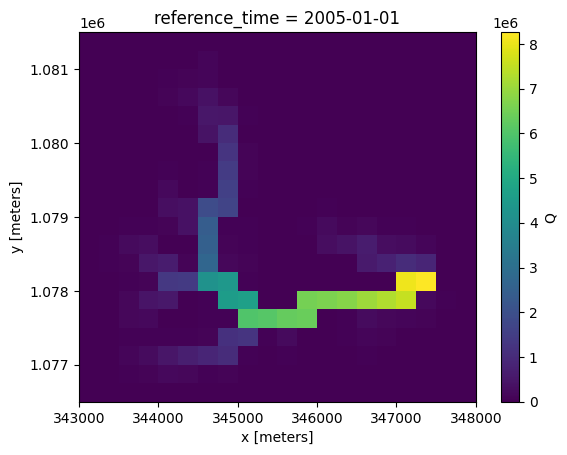

In [78]:
dc1.Q.sum(dim='time').plot()

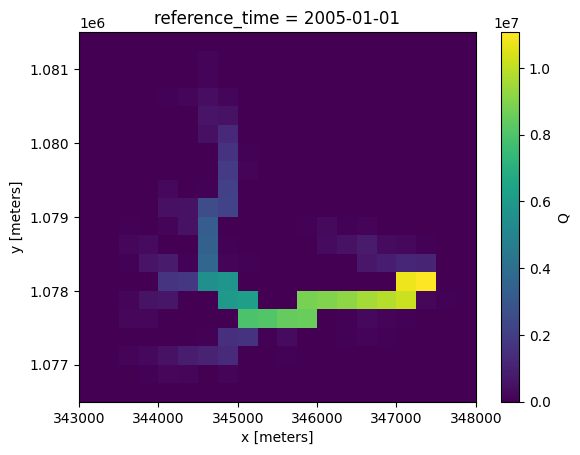

In [79]:
dc2.Q.sum(dim='time').plot()

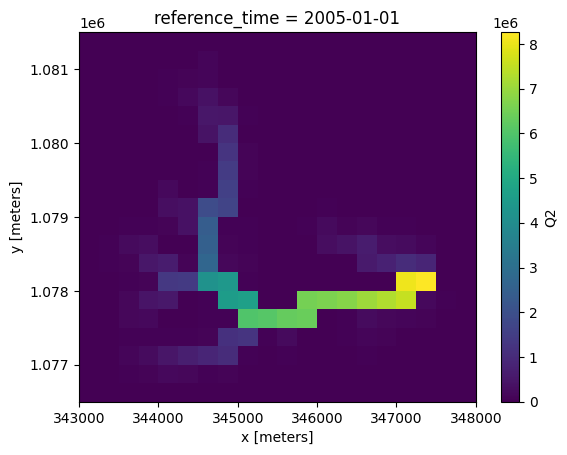

In [47]:
dc1.Q2.sum(dim='time').plot()

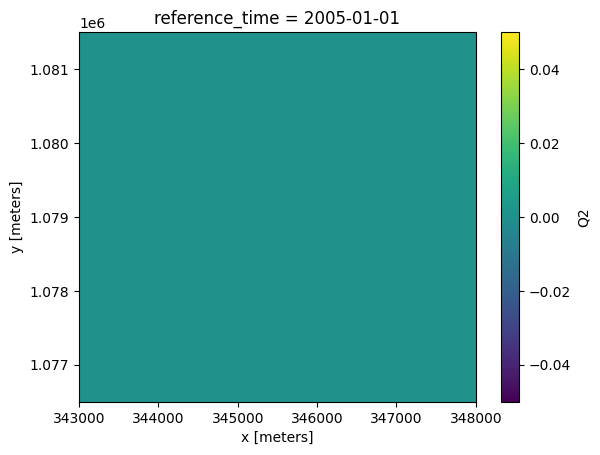

In [48]:
dc2.Q2.sum(dim='time').plot()

In [86]:
import datetime

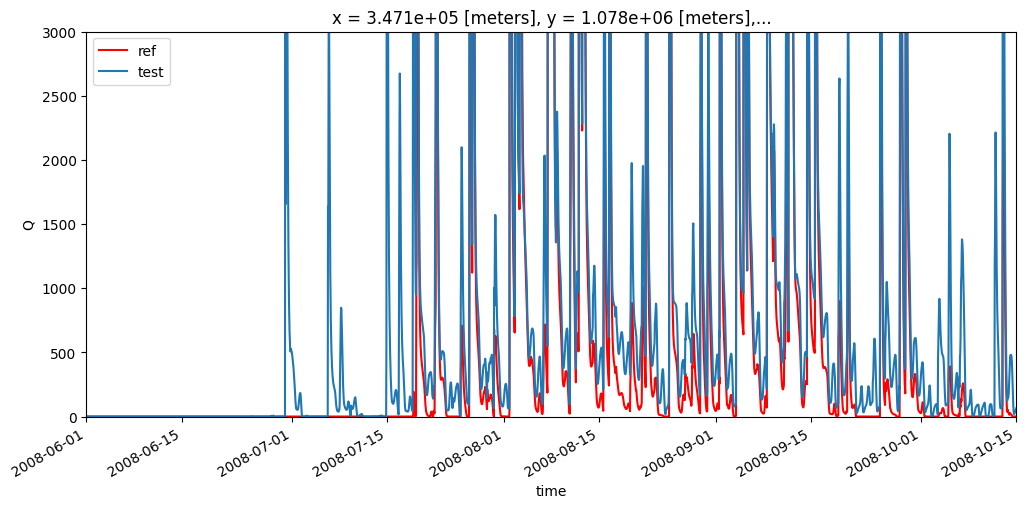

In [91]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
dc1.Q.sel(x=347150,y=1077850,method='nearest').plot(ax=ax,c='r',label='ref')
dc2.Q.sel(x=347150,y=1077850,method='nearest').plot(ax=ax,label='test')
ax.set_xlim((datetime.datetime(2008,6,1),datetime.datetime(2008,10,15)))
ax.set_ylim(0,3000)
plt.legend()


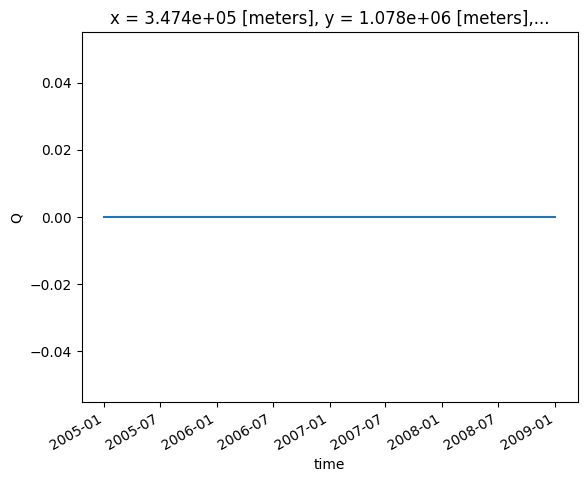

In [82]:
dc1.Q.sel(x=347400,y=1078000,method='nearest').plot()


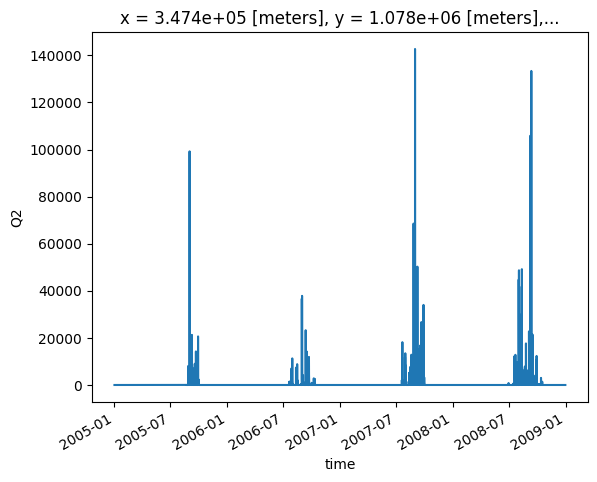

In [47]:
dc1.Q2.sel(x=347400,y=1078000,method='nearest').plot()

In [56]:
mask[0,:,:].sum()*250*250

12812500.0

In [67]:
dc1.Q.sel(x=347400,y=1078000,method='nearest').resample(time='Y').sum()/(mask[0,:,:].sum()*250*250)*1000

<xarray.DataArray 'Q' (time: 4)>
array([ 88.87078377,  74.38320473, 219.81124958, 261.77513262])
Coordinates:
    x               float64 3.474e+05
    y               float64 1.078e+06
    reference_time  datetime64[ns] 2005-01-01
  * time            (time) datetime64[ns] 2005-12-31 2006-12-31 ... 2008-12-31

In [68]:
dc1.Q2.sel(x=347400,y=1078000,method='nearest').resample(time='Y').sum()/(mask[0,:,:].sum()*250*250)*1000

<xarray.DataArray 'Q2' (time: 4)>
array([ 88.87078377,  74.38320473, 219.81124958, 261.77513262])
Coordinates:
    x               float64 3.474e+05
    y               float64 1.078e+06
    reference_time  datetime64[ns] 2005-01-01
  * time            (time) datetime64[ns] 2005-12-31 2006-12-31 ... 2008-12-31

dc1 = read_clm_outputs(root_dir+'results_benchmark/')
#dc2 = read_clm_outputs(root_dir+'results_nowaterstress/')

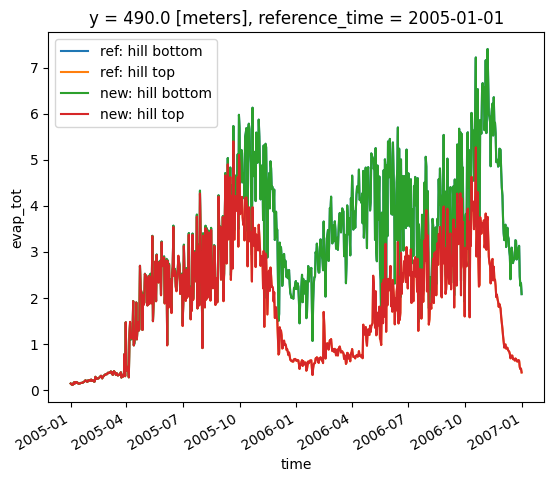

In [22]:
from matplotlib import pyplot as plt
dc1.evap_tot.isel(y=0).resample(time='D').sum().plot(label='ref: hill bottom')
dc1.evap_tot.isel(y=49).resample(time='D').sum().plot(label='ref: hill top')
dc2.evap_tot.isel(y=0).resample(time='D').sum().plot(label='new: hill bottom')
dc2.evap_tot.isel(y=49).resample(time='D').sum().plot(label='new: hill top')
plt.gca().legend()

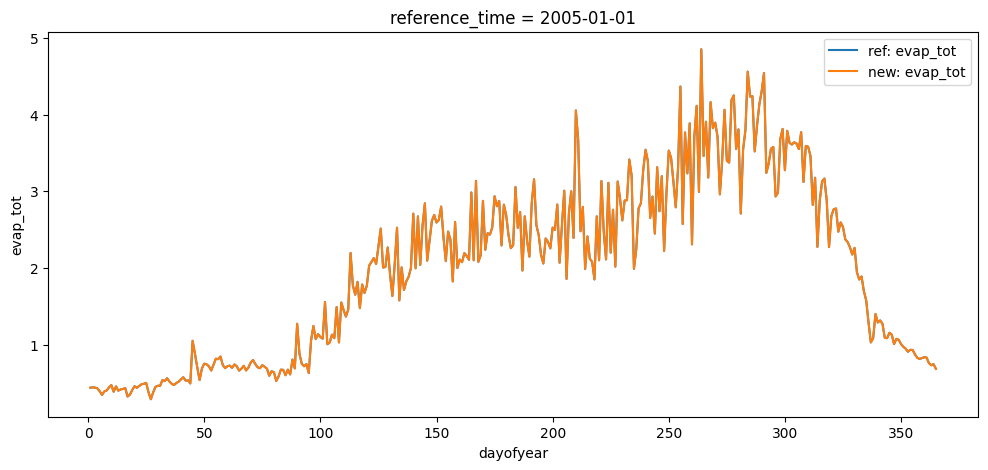

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
dc1.evap_tot.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean().plot(label='ref: evap_tot')
dc2.evap_tot.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean().plot(label='new: evap_tot')
a = plt.gca()
a.legend()